In [1]:
#Hemant Joshi TY ET A 44

In [2]:
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt

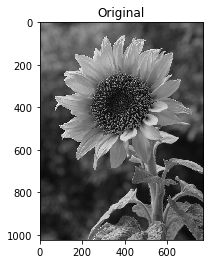

In [3]:
img = cv2.imread('D:\TY ET A\CV\sunflower.jpg', 0)
plt.imshow(img,cmap="gray")
plt.title('Original')
plt.show()


In [4]:
def sp_noise (image, prob):
    output=np.zeros (image.shape, np.uint8)
    thres=1-prob
    for i in range (image.shape [0]):
        for j in range (image.shape [1]):
            rdn=random.random ()
            if rdn<prob:
                output [i] [j]=0
            elif rdn>thres:
                output [i] [j]=255
            else:
                output [i] [j]=image [i] [j]
    return output
def gauss_noise (image, mean=0, var=0.001):
    image=np.array (image/255, dtype=float)
    noise=np.random.normal (mean, var ** 0.5, image.shape)
    out=image + noise
    if out.min ()<0:
        low_clip=-1.
    else:
        low_clip=0.
    out=np.clip (out, low_clip, 1.0)
    out=np.uint8 (out * 255)
    return out

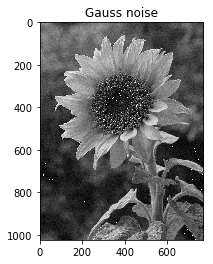

In [5]:
image_gauss=gauss_noise(img)
plt.imshow(image_gauss,cmap="gray")
plt.title('Gauss noise')
plt.show()

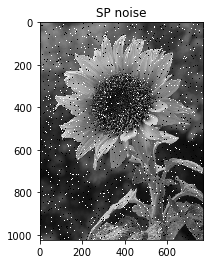

In [6]:
image_sp=sp_noise(img,0.02)
plt.imshow(image_sp,cmap="gray")
plt.title('SP noise')
plt.show()

In [7]:
def medianf():
    median = cv2.medianBlur(image_gauss, 5)
    plt.imshow(median,cmap="gray")
    plt.title('Median filter')
    plt.show()

In [8]:
def average():
    kernel1 =np.ones((5,5),np.float32)/9
    img_avg = cv2.filter2D(image_sp,-1,kernel1)

    plt.imshow(img_avg,cmap="gray")
    plt.title('Avg filter')
    plt.show()

In [9]:
def highpass():
    kernel = np.array([[-1.0, -1.0, -1.0], 
                       [-1.0, 8.0, -1.0],
                       [-1.0, -1.0, -1.0]])

    kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

    img_rst = cv2.filter2D(image_sp,-1,kernel)

    plt.imshow(img_rst,cmap="gray")
    plt.title('High Pass filter')
    plt.show()
    return img_rst

In [ ]:
def highboost():
    boost=3*image_sp-highpass()
    plt.imshow(boost,cmap="gray")
    plt.title('High boost filter')
    plt.show()

Select the filtering you want to perform on input image.
 1:Median filter 2:Highpass 3:Average 4:Highboost : 2


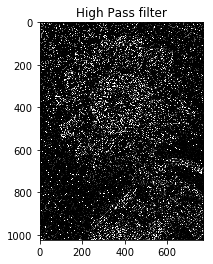

Select the filtering you want to perform on input image.
 1:Median filter 2:Highpass 3:Average 4:Highboost : 4


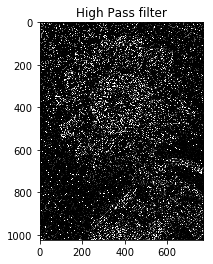

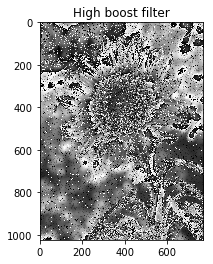

In [ ]:
x=int(input('Select the filtering you want to perform on input image.\n 1:Median filter 2:Highpass 3:Average 4:Highboost : '))
while(x!=0):
    if x==1:medianf()
    elif x==2:highpass()
    elif x==3:average()
    elif x==4:highboost()
    else: print('Invalid Choice')
    x=int(input('Select the filtering you want to perform on input image.\n 1:Median filter 2:Highpass 3:Average 4:Highboost : '))